# Exploratory Analysis

 This is the exploratory analysis based on the rodent inspection in New York. This analysis is aimed to analyze the rodent inspection requirements in New York over the past 10 years to predict the rodent population change in New York. The dataset is downloaded from https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj, 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('Rodent_Inspection.csv')
df.head(5)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,INITIAL,1477376,PO1477376,1,3030820047,3,3082,47,71,WHITE ST,11206.0,1002123.0,196551.0,40.706139,-73.935536,Brooklyn,08/02/2017 02:27:38 PM,Active Rat Signs,08/04/2017 09:20:05 AM,"(40.706138857298, -73.935535793927)"
1,INITIAL,1475045,PO1475045,1,4114050014,4,11405,14,90-14,SPRITZ ROAD,11417.0,1027048.0,184240.0,40.672262,-73.845715,Queens,08/03/2017 09:55:13 AM,Passed Inspection,08/04/2017 03:38:17 PM,"(40.672262220686, -73.845715127375)"
2,INITIAL,1452020,PO1452020,1,5047260021,5,4726,21,566,PENDALE STREET,10306.0,950078.0,142898.0,40.558825,-74.122979,Staten Island,08/04/2017 03:45:29 PM,Passed Inspection,08/07/2017 10:33:10 AM,"(40.558825095548, -74.12297853578)"
3,INITIAL,1477484,PO1477484,1,3064370028,3,6437,28,173,BAY 19TH STREET,11214.0,982644.0,159091.0,40.603337,-74.005784,Brooklyn,08/01/2017 02:00:29 PM,Passed Inspection,08/07/2017 01:54:46 PM,"(40.603337405696, -74.005783555146)"
4,INITIAL,1461449,PO1461449,1,2022800130,2,2280,130,448,EAST 136TH STREET,10454.0,1005678.0,233399.0,40.807270,-73.922596,Bronx,08/04/2017 09:55:51 AM,Passed Inspection,08/07/2017 09:43:00 AM,"(40.807269769566, -73.922595760958)"


To understand the trend, I firstly plot the total Roment innpection number in New York over the past 10 years, and it is clearly showed that the inspection times is increasing in recent 10 years(2010-2019)

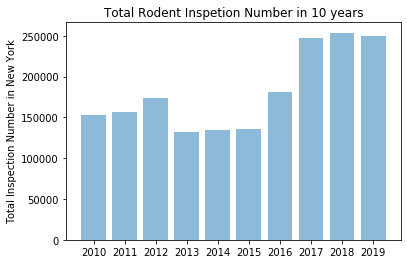

In [3]:
date = list(df['APPROVED_DATE'])
years = []
for i in date:
    year = str(i).split()[0][6:11]
    years.append(year)
df['year'] = years
df_2019 = df[(df['year'] == '2019')]
df_2018 = df[(df['year'] == '2018')]
df_2017 = df[(df['year'] == '2017')]
df_2016 = df[(df['year'] == '2016')]
df_2015 = df[(df['year'] == '2015')]
df_2014 = df[(df['year'] == '2014')]
df_2013 = df[(df['year'] == '2013')]
df_2012 = df[(df['year'] == '2012')]
df_2011 = df[(df['year'] == '2011')]
df_2010 = df[(df['year'] == '2010')]
total_inspection = [len(df_2019), len(df_2018), len(df_2017),len(df_2016),len(df_2015),len(df_2014),
                   len(df_2013), len(df_2012), len(df_2011), len(df_2010)]
total_inspection = total_inspection[::-1]
years = np.arange(2010, 2020)
y_pos = np.arange(len(years))
plt.bar(y_pos, total_inspection, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Total Inspection Number in New York')
plt.title('Total Rodent Inspetion Number in 10 years')
plt.show()

I also want to look at which borough has the most inspection number in 2019, which means at that area the rodent population is the highest. By comparing the data from 2017-2019, inspection times in Brooklyn and Manhattan are significantly higher than other three boroughs, and staten island has the smallest number of inspection.

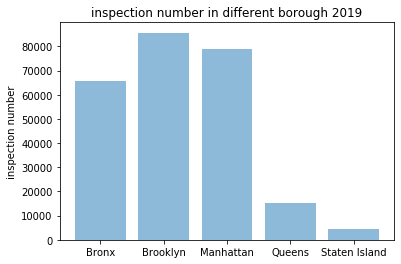

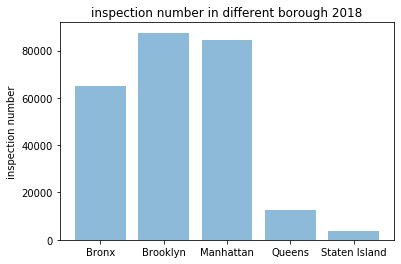

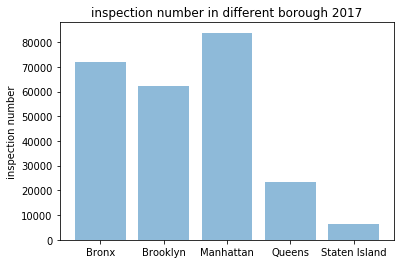

In [4]:
df_10 = pd.concat([df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010])
df_date = df_10.groupby(['year'])
#df_it.groups.keys()

df_2019 = df_date.get_group('2019')
df_2019_zc = df_2019.groupby('BOROUGH')
keys = list(df_2019_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2019_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different borough 2019')
plt.show()
df_2018 = df_date.get_group('2018')
df_2018_zc = df_2018.groupby('BOROUGH')
keys = list(df_2018_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2018_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different borough 2018')
plt.show()
df_2017 = df_date.get_group('2017')
df_2017_zc = df_2017.groupby('BOROUGH')
keys = list(df_2017_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2017_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different borough 2017')
plt.show()

To understand the trends in each borough, I plot a line plot for total inspection time in each borough to recent 10 years. The figure shows that all the boroughs have increasing rodent population in 10 years. Manhattan and Brooklyn have similar trends in the past decade. Besides, rodent inspection times in Queens and Staten Island are much lower than other boroughs from 2011 to 2019.

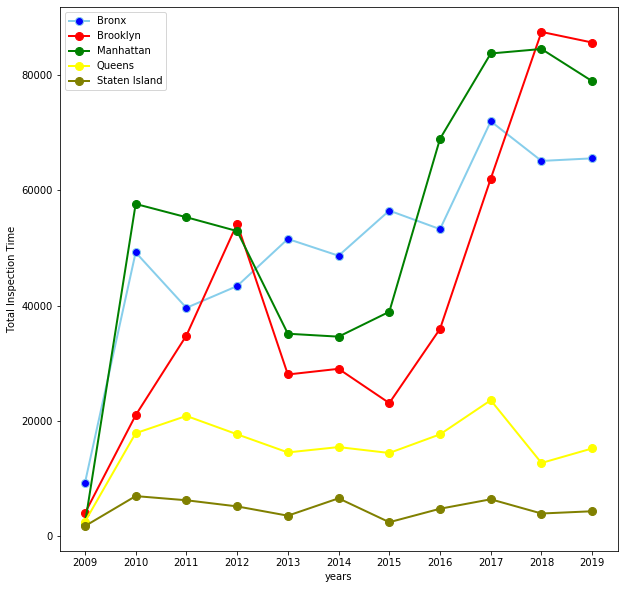

In [24]:
def inspection_time(years, data):
    inspection_time = []
    for year in years[1: len(years) - 1]:
        inspection = len(data.get_group(year).loc[:, 'INSPECTION_TYPE'])
        inspection_time.append(inspection)
    return inspection_time
    
df_borough = df.groupby('BOROUGH') 
df_Bronx = df_borough.get_group('Bronx').groupby('year')
df_Brooklyn = df_borough.get_group('Brooklyn').groupby('year')
df_Manhattan = df_borough.get_group('Manhattan').groupby('year')
df_Queens = df_borough.get_group('Queens').groupby('year')
df_Staten_Island = df_borough.get_group('Staten Island').groupby('year')
years = list(df_Bronx.groups.keys())
inspection_time_Bronx = inspection_time(years, df_Bronx)
inspection_time_Brooklyn = inspection_time(years, df_Brooklyn)
inspection_time_Manhattan = inspection_time(years, df_Manhattan)
inspection_time_Queens = inspection_time(years, df_Queens)
inspection_time_Staten_Island = inspection_time(years, df_Staten_Island)
df_inspection_to_year = pd.DataFrame({'x': years[1:len(years) - 1], 'Bronx': inspection_time_Bronx, 'Brooklyn': inspection_time_Brooklyn,
                                      'Manhattan':inspection_time_Manhattan, 'Queens':inspection_time_Queens, 
                                      'Staten Island':inspection_time_Staten_Island})

plt.figure(figsize=(10, 10))
plt.plot( 'x', 'Bronx', data=df_inspection_to_year, marker='o', markerfacecolor='blue', markersize=8, 
         color='skyblue', linewidth=2)
plt.plot( 'x', 'Brooklyn', data=df_inspection_to_year, marker='o', markerfacecolor='red', markersize=8, 
         color='red', linewidth=2)
plt.plot( 'x', 'Manhattan', data=df_inspection_to_year, marker='o', markerfacecolor='green', markersize=8, 
         color='green', linewidth=2)
plt.plot( 'x', 'Queens', data=df_inspection_to_year, marker='o', markerfacecolor='yellow', markersize=8, 
         color='yellow', linewidth=2)
plt.plot( 'x', 'Staten Island', data=df_inspection_to_year, marker='o', markerfacecolor='olive', markersize=8, 
         color='olive', linewidth=2)
plt.xlabel('years')
plt.ylabel('Total Inspection Time')
plt.legend()

    